In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
import random

import matplotlib.pyplot as plt
from sklearn.cluster import k_means

random.seed(0)

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
site_key = 'Central'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.npy', allow_pickle=True)

location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index
location_calls_sampled

index   SD_card            file_name          site        SNR  \
0         0         8  20220726_010000.WAV  Central Pond  10.425013   
1         1         8  20220726_020000.WAV  Central Pond   9.949917   
2         2  UBNA_008  20220726_030000.WAV  Central Pond  16.520588   
3         3  UBNA_008  20220726_040000.WAV  Central Pond  10.028950   
4         4  UBNA_008  20220726_043000.WAV  Central Pond  35.272173   
...     ...       ...                  ...           ...        ...   
3490   3490         9  20221017_080000.WAV  Central Pond  22.528397   
3491   3491         9  20221017_090000.WAV  Central Pond  33.800245   
3492   3492         9  20221017_090000.WAV  Central Pond  20.870094   
3493   3493         9  20221017_090000.WAV  Central Pond  28.802986   
3494   3494         9  20221017_100000.WAV  Central Pond  23.691891   

      sampling_rate  
0            250000  
1            250000  
2            250000  
3            250000  
4            250000  
...             ...  
3490         192000  
3491         192000  
3492         192000  
3493         192000  
3494         192000  

[3495 rows x 6 columns]

In [5]:
snr_thresh = 10
good_snr_location_calls_sampled = location_calls_sampled.loc[location_calls_sampled['SNR']>=snr_thresh].copy()
good_snr_location_calls_sampled.set_index(keys=np.arange(len(good_snr_location_calls_sampled)), inplace=True)
good_snr_location_calls_sampled

index   SD_card            file_name          site        SNR  \
0         0         8  20220726_010000.WAV  Central Pond  10.425013   
1         2  UBNA_008  20220726_030000.WAV  Central Pond  16.520588   
2         3  UBNA_008  20220726_040000.WAV  Central Pond  10.028950   
3         4  UBNA_008  20220726_043000.WAV  Central Pond  35.272173   
4         5  UBNA_008  20220726_043000.WAV  Central Pond  24.805620   
...     ...       ...                  ...           ...        ...   
3169   3490         9  20221017_080000.WAV  Central Pond  22.528397   
3170   3491         9  20221017_090000.WAV  Central Pond  33.800245   
3171   3492         9  20221017_090000.WAV  Central Pond  20.870094   
3172   3493         9  20221017_090000.WAV  Central Pond  28.802986   
3173   3494         9  20221017_100000.WAV  Central Pond  23.691891   

      sampling_rate  
0            250000  
1            250000  
2            250000  
3            250000  
4            250000  
...             ...  
3169         192000  
3170         192000  
3171         192000  
3172         192000  
3173         192000  

[3174 rows x 6 columns]

In [6]:
n = 10
call_indices = random.sample(range(0, len(good_snr_location_calls_sampled)), n**2)

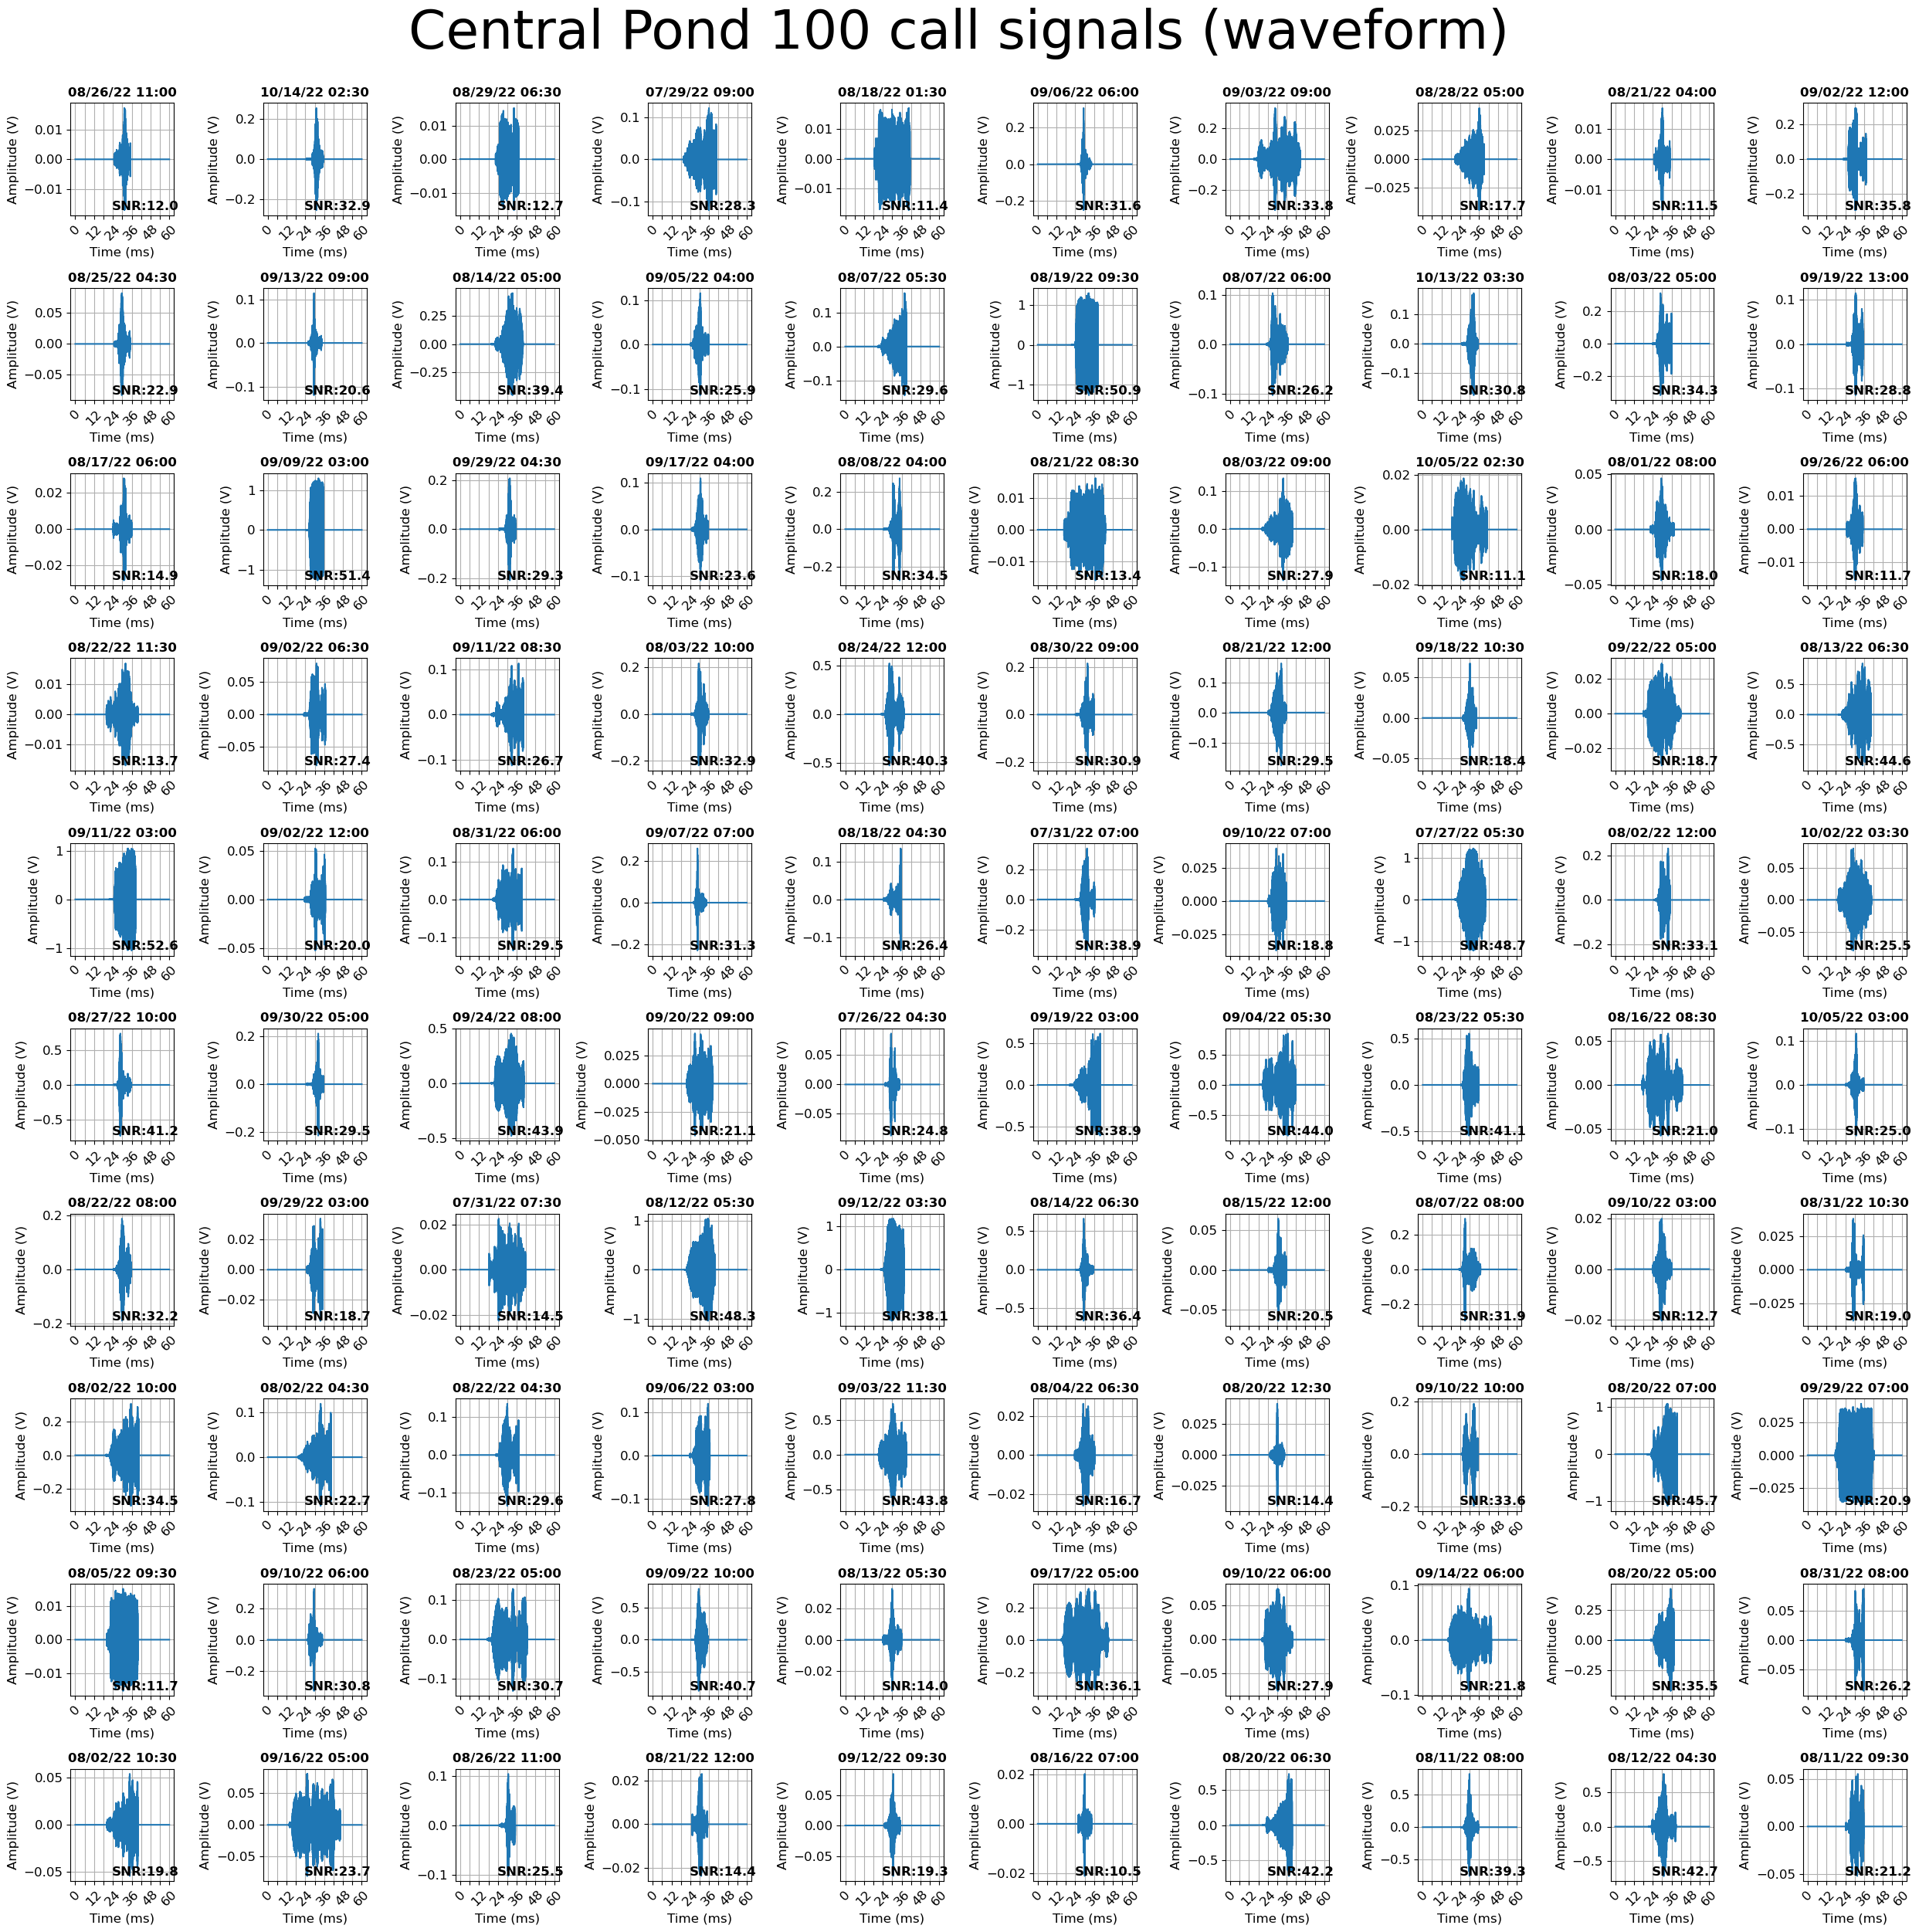

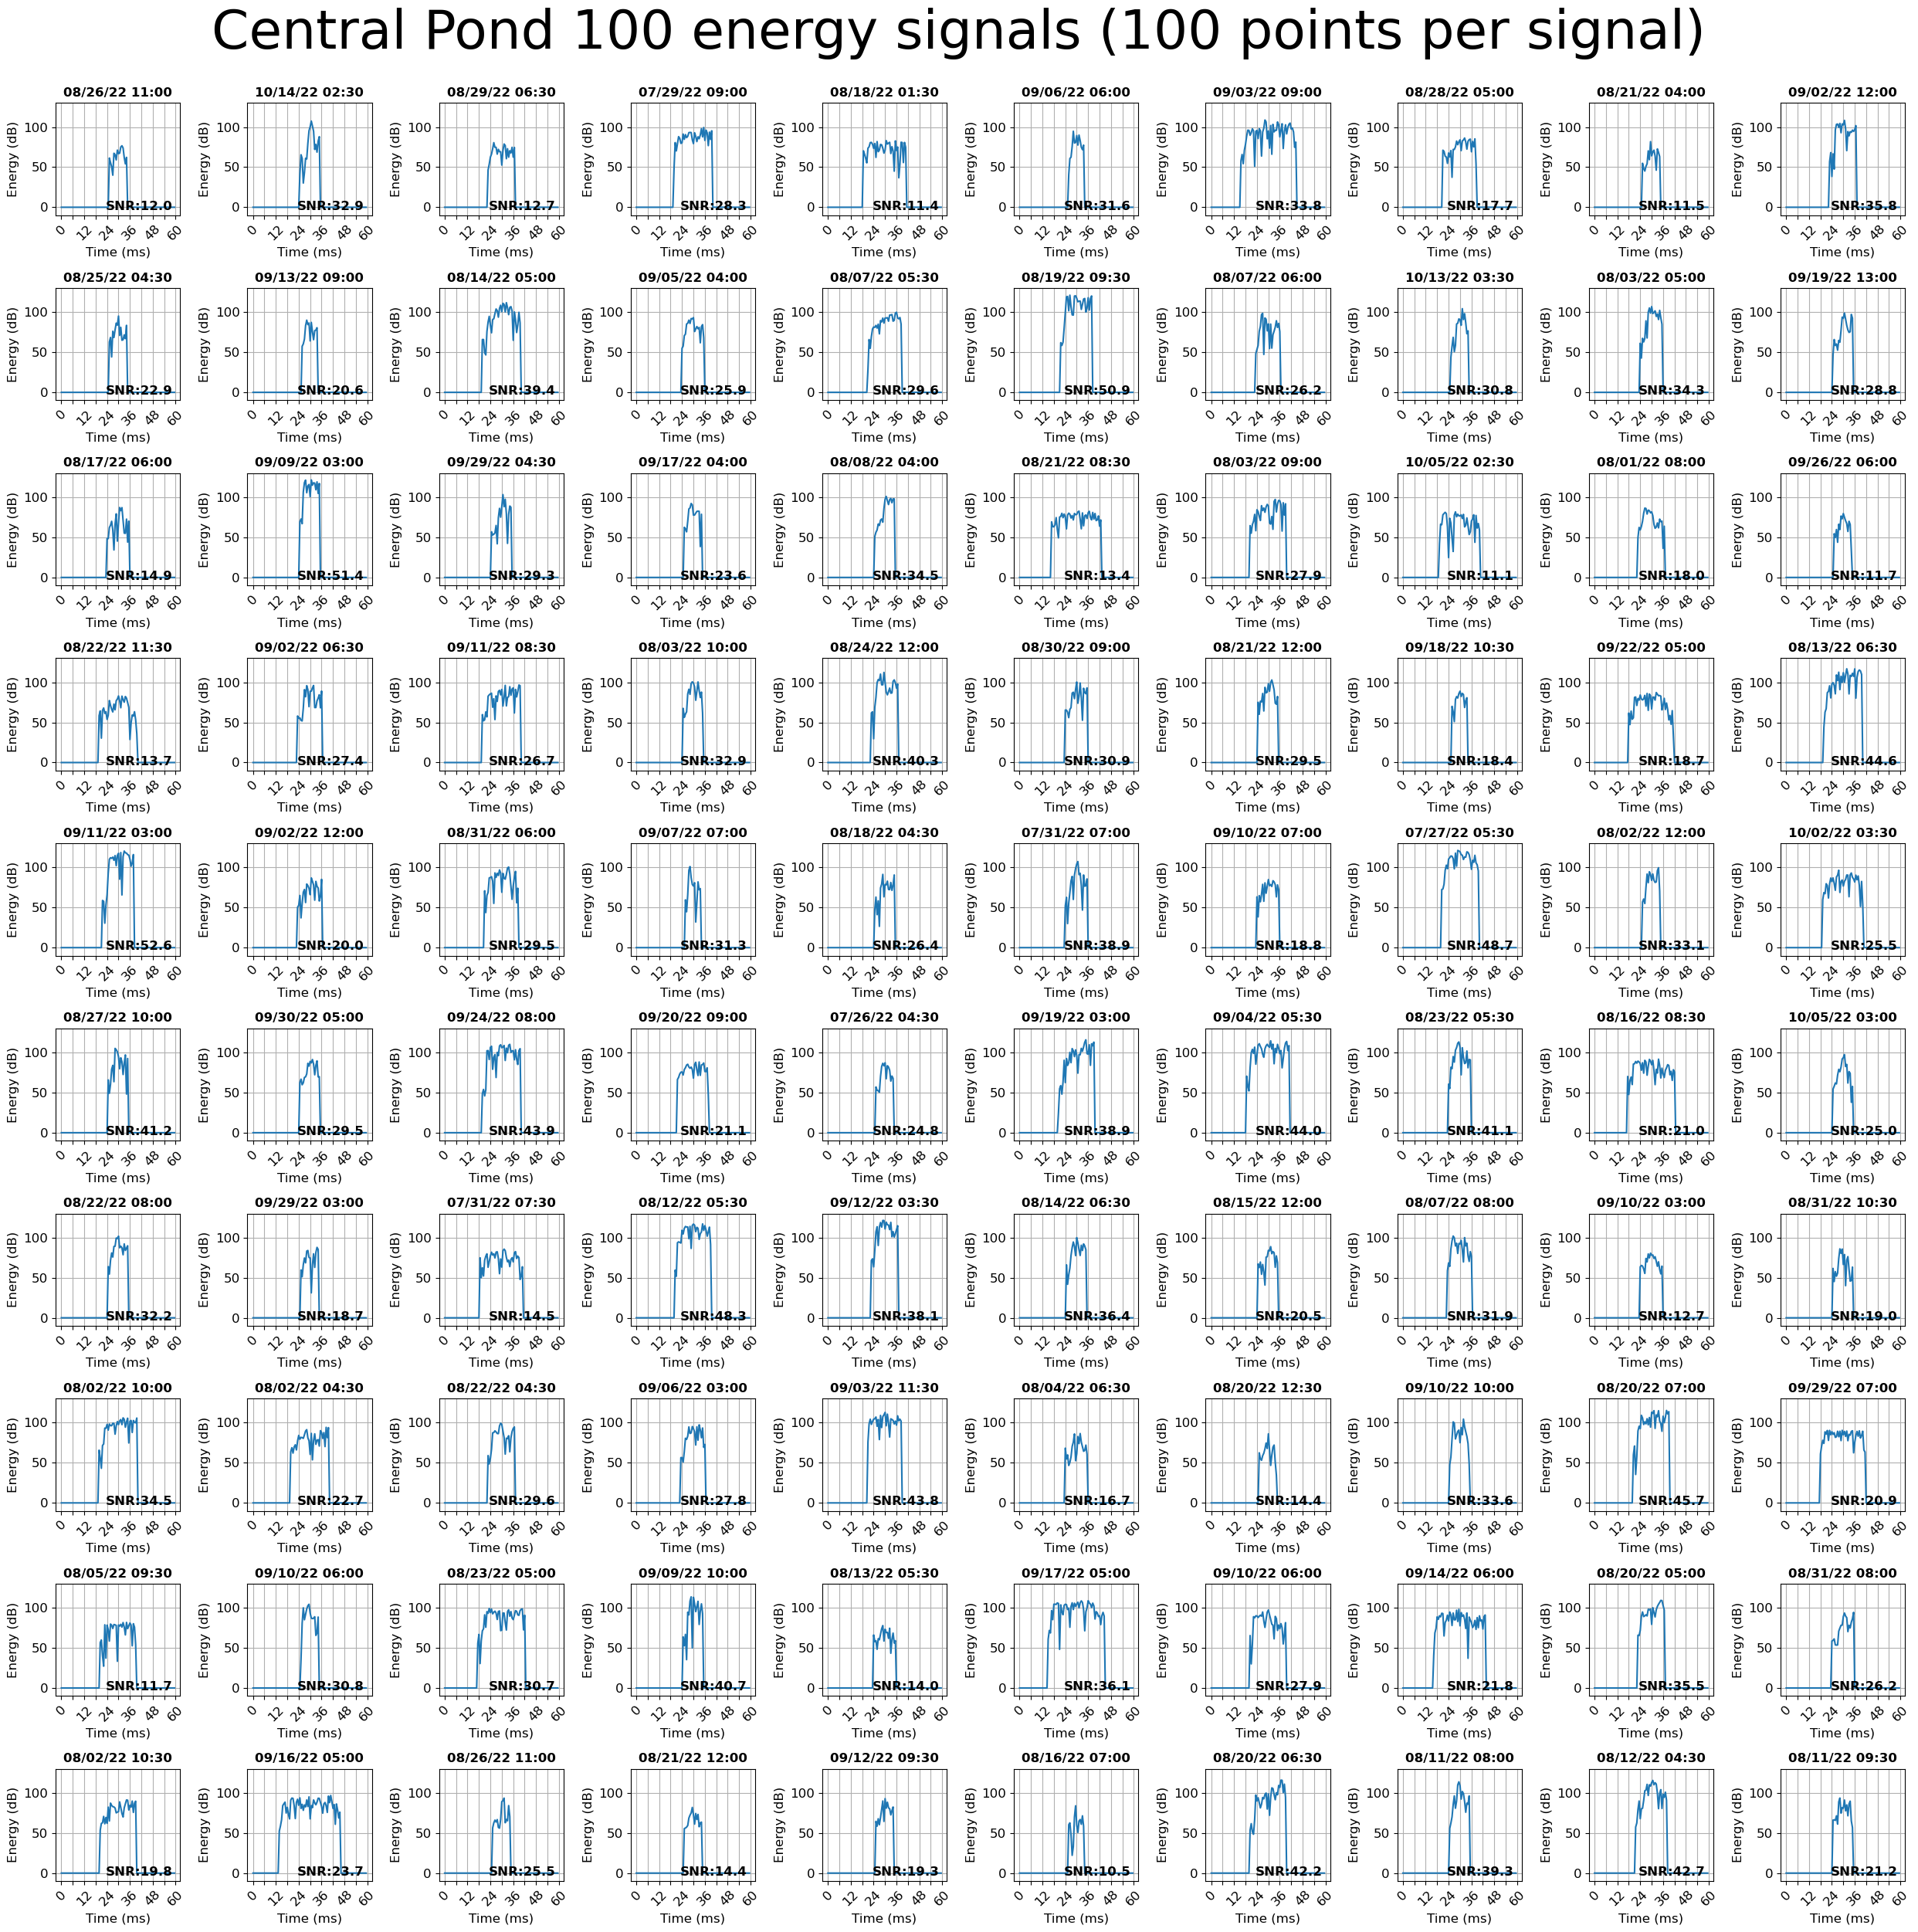

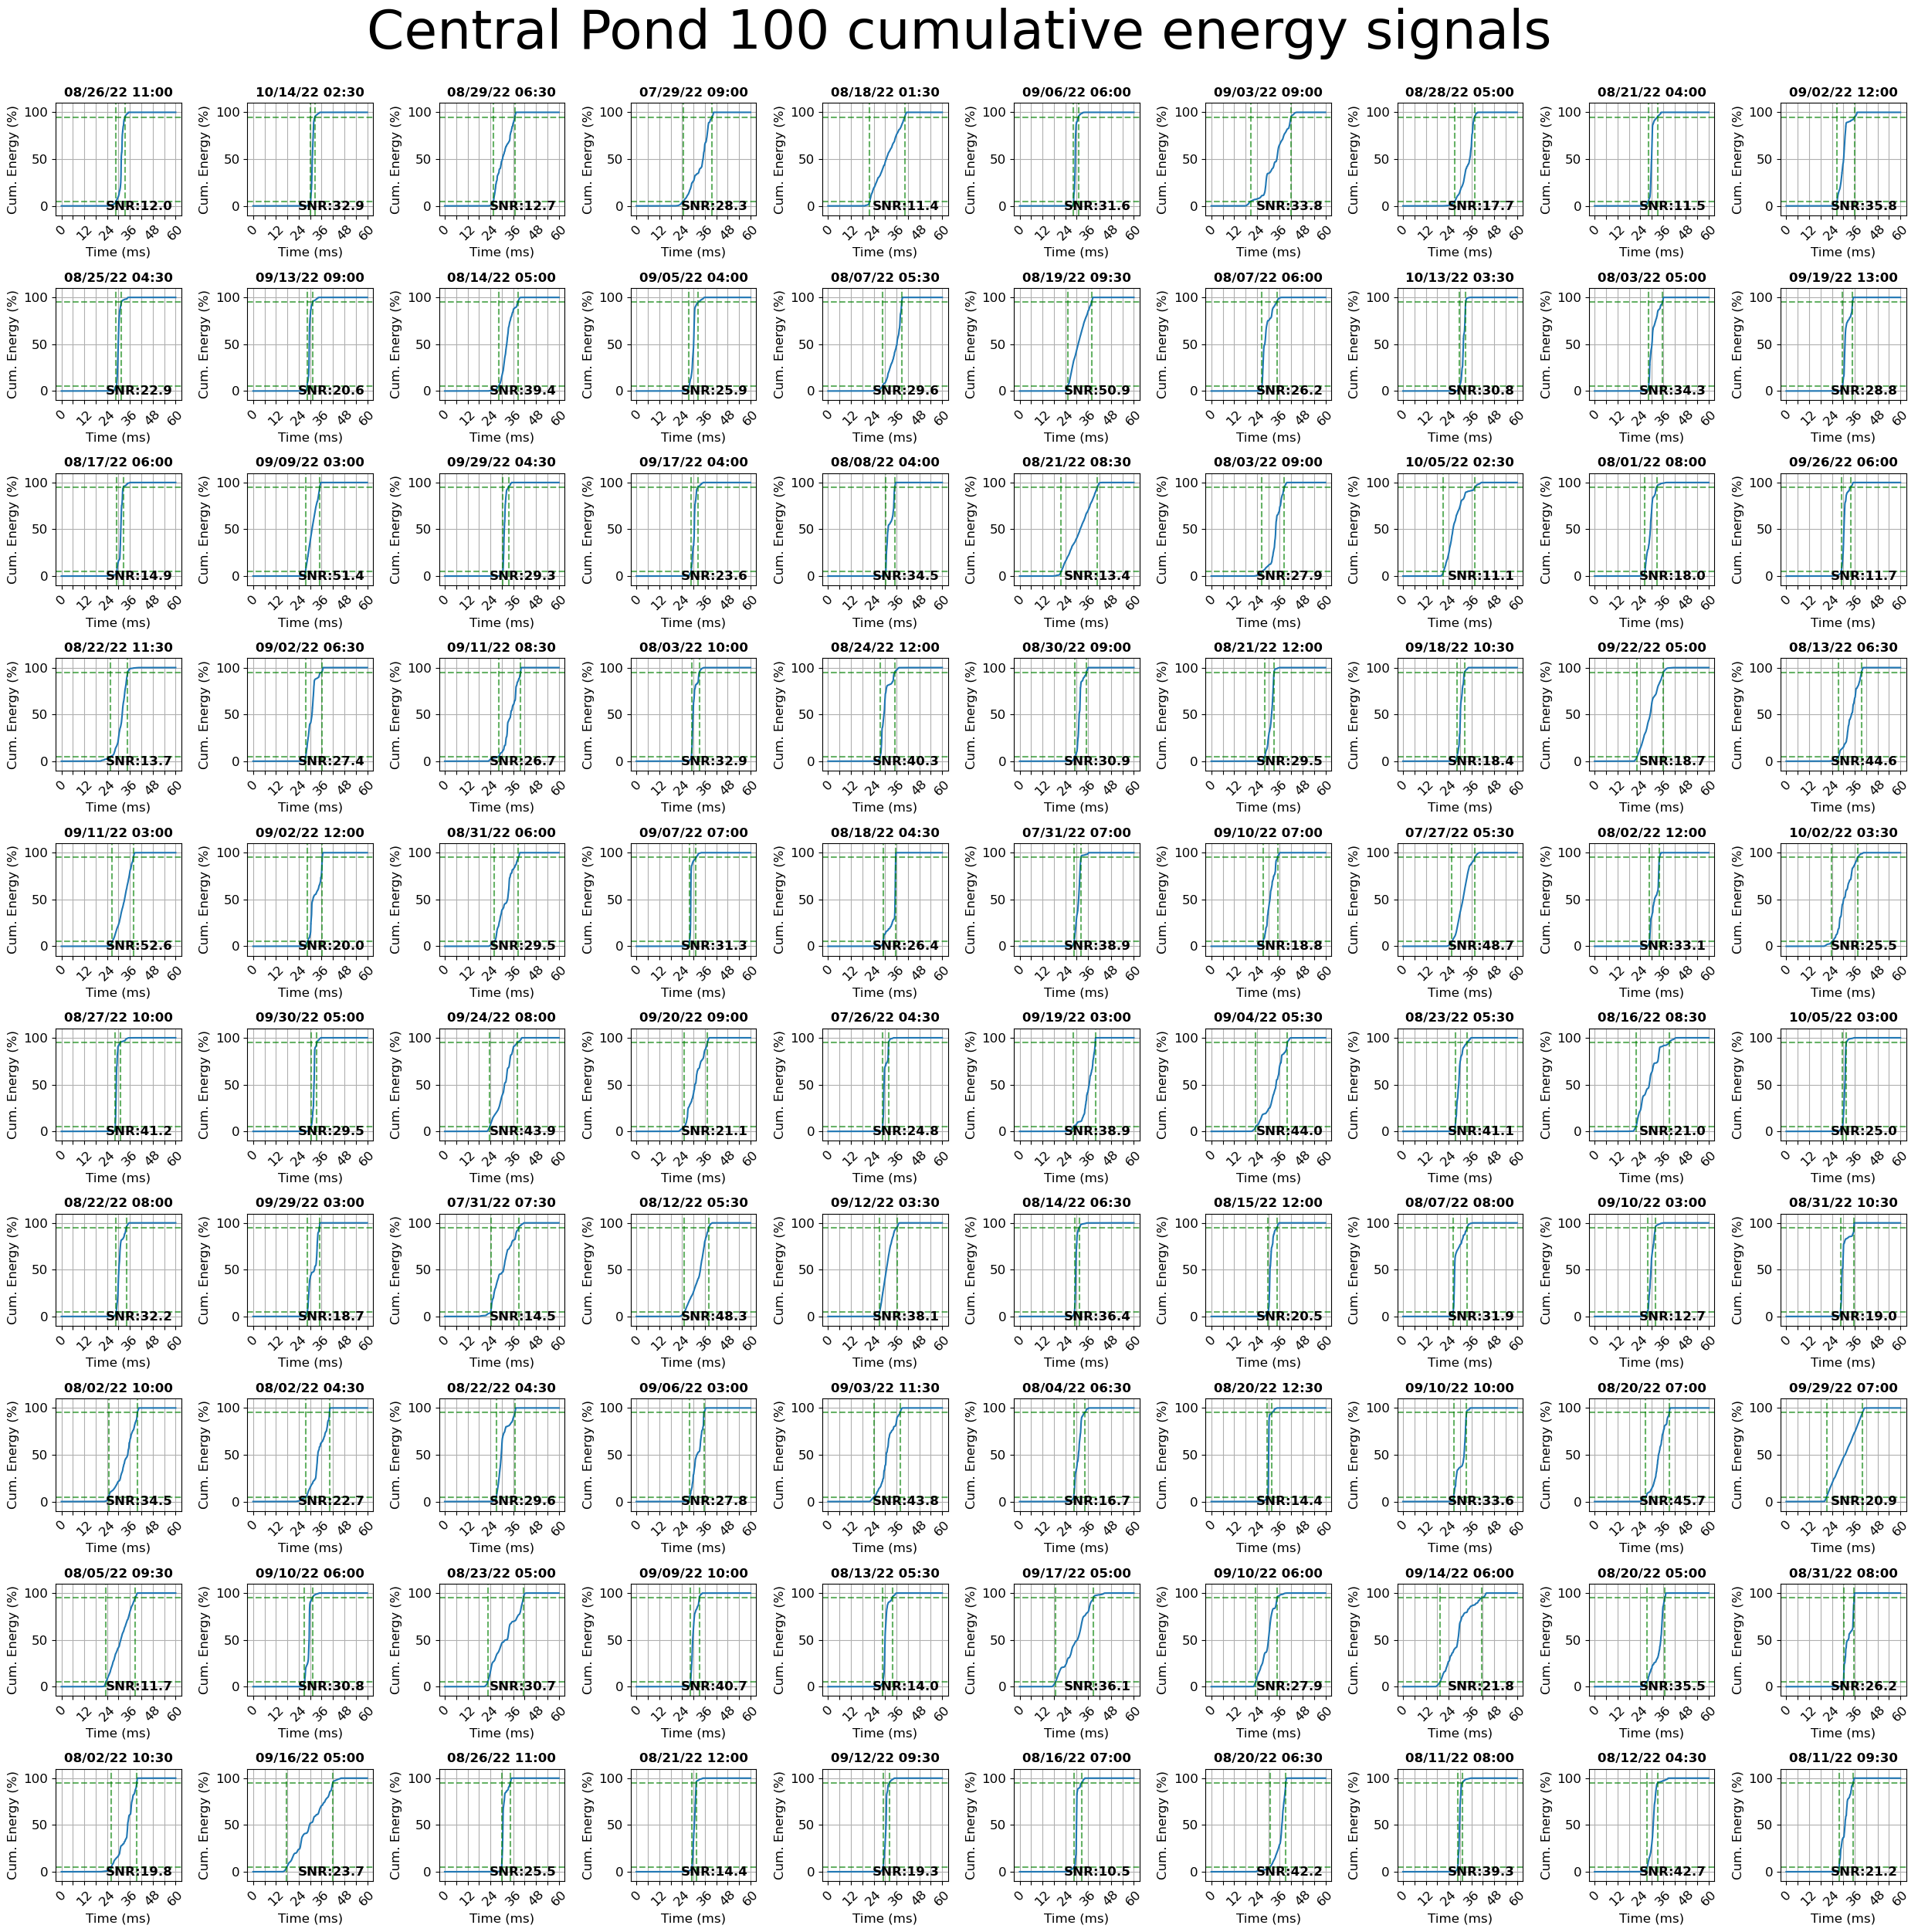

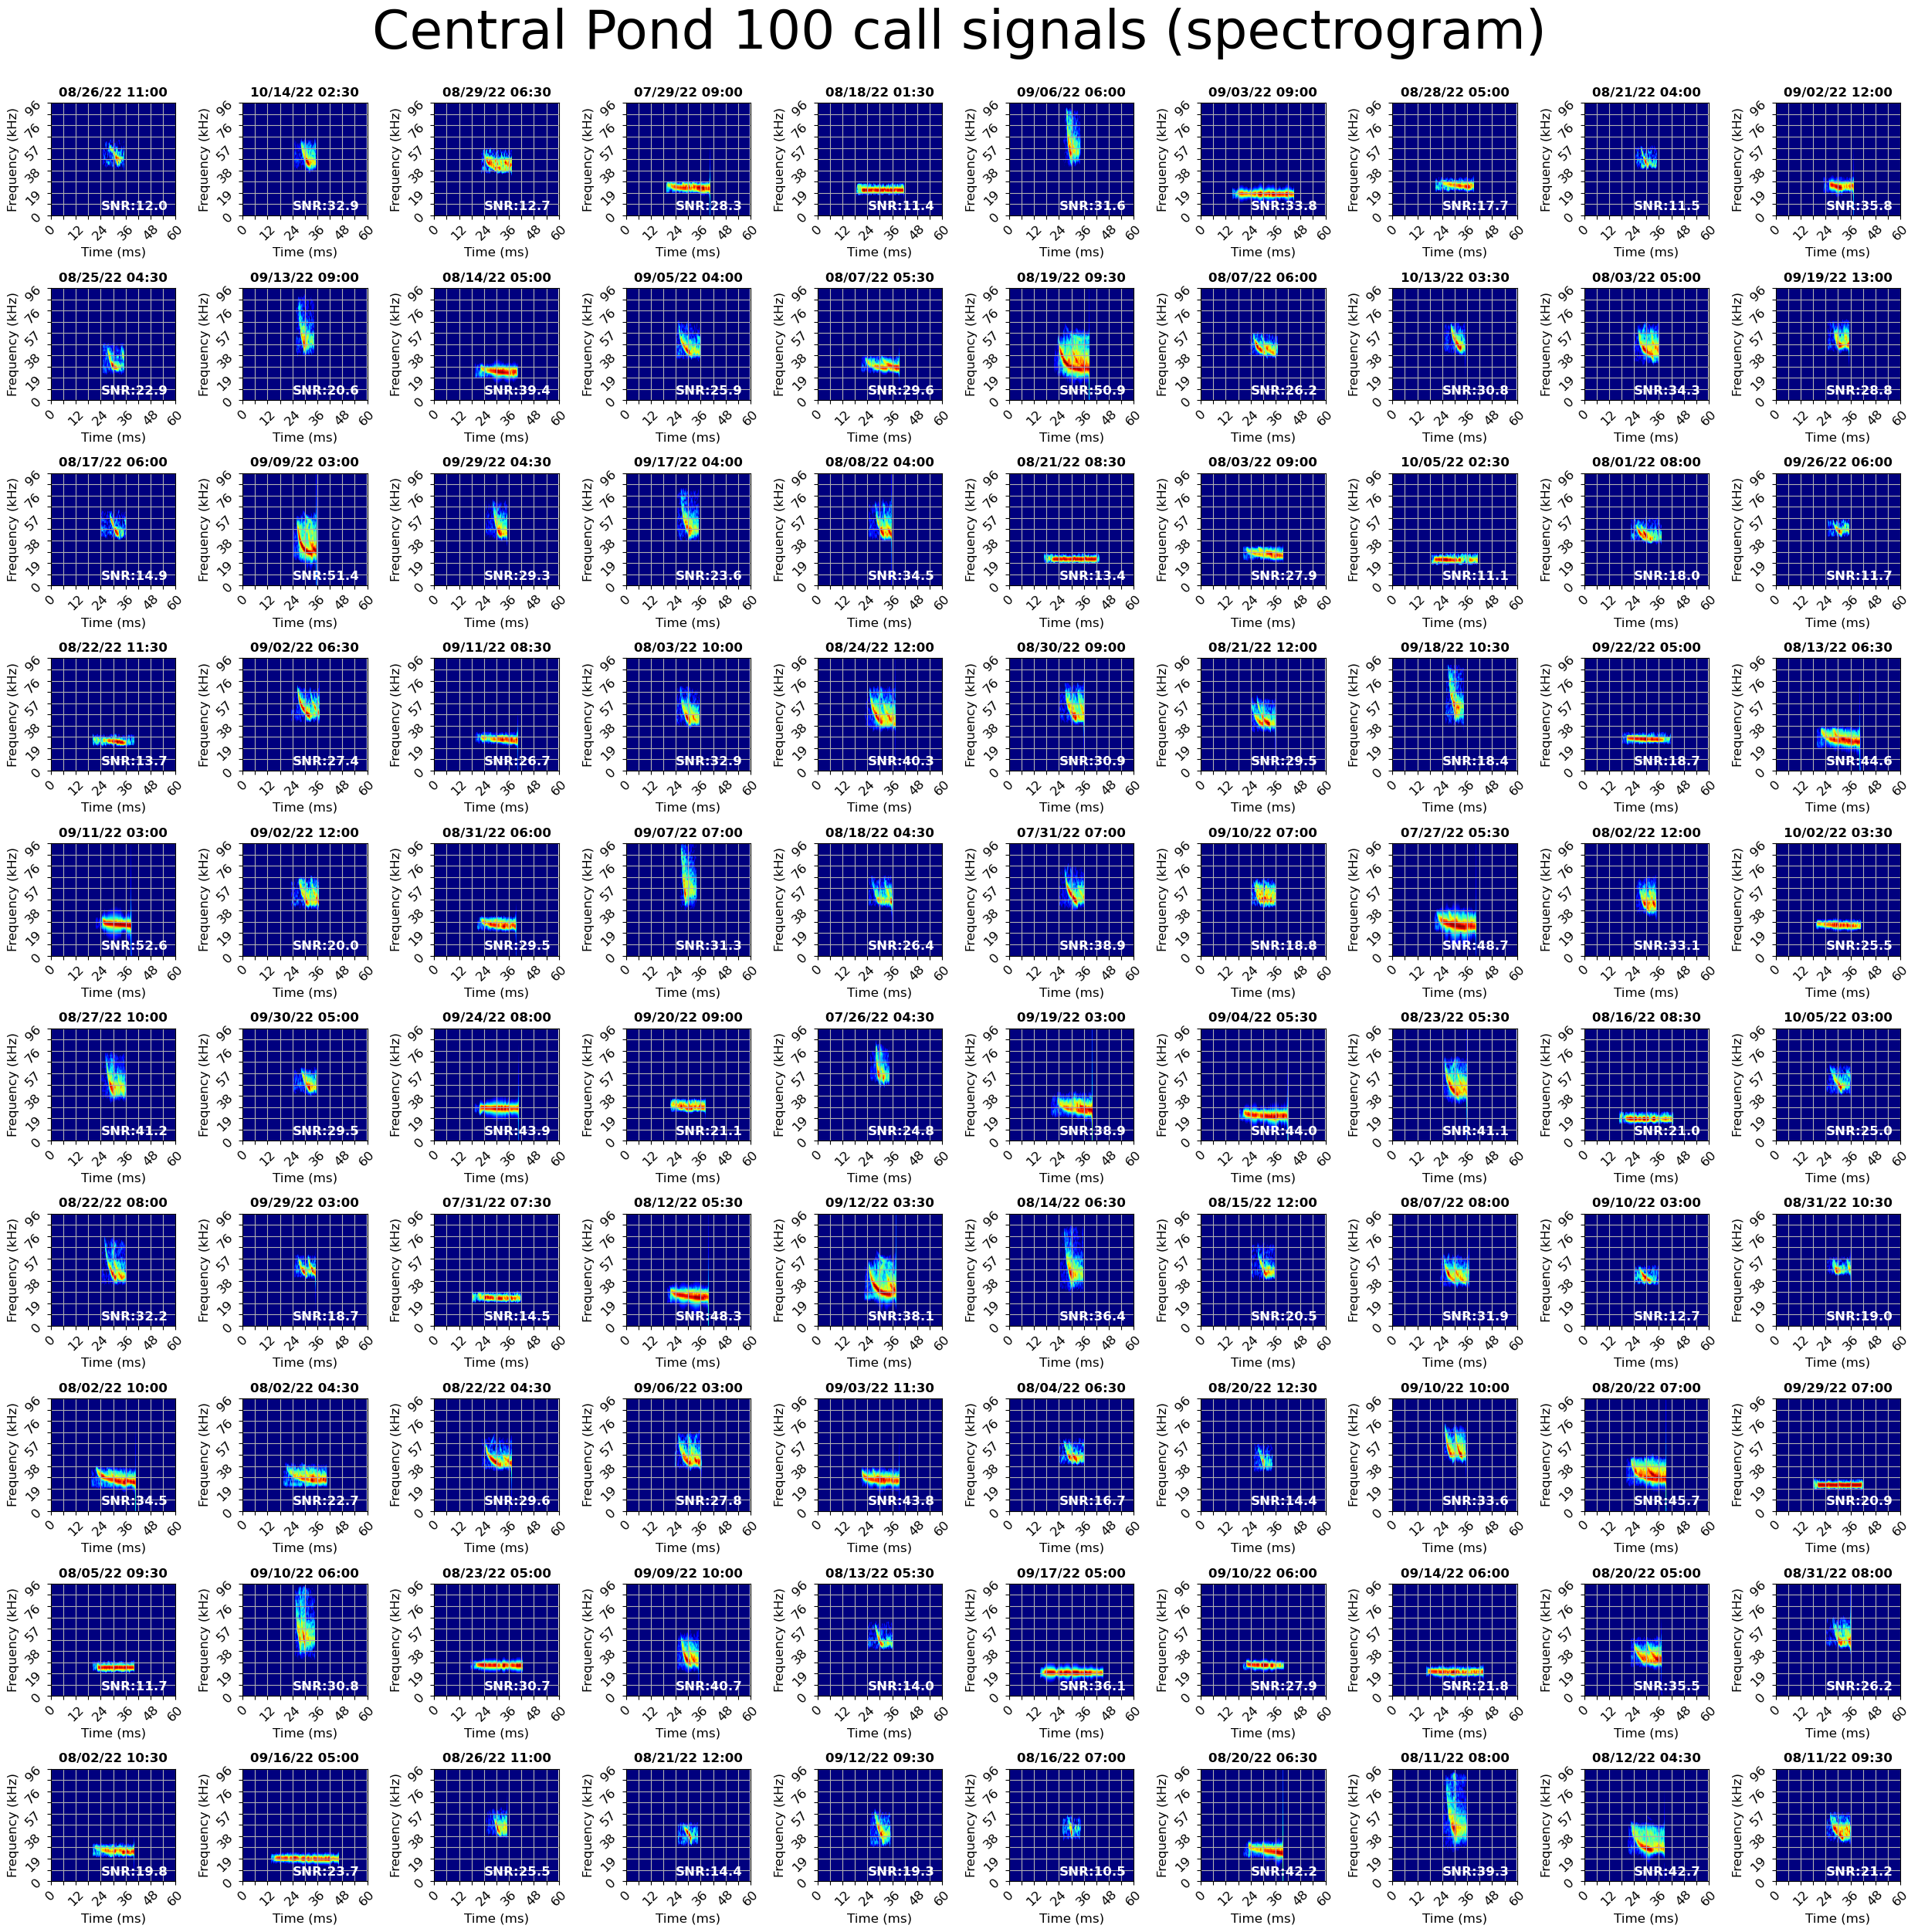

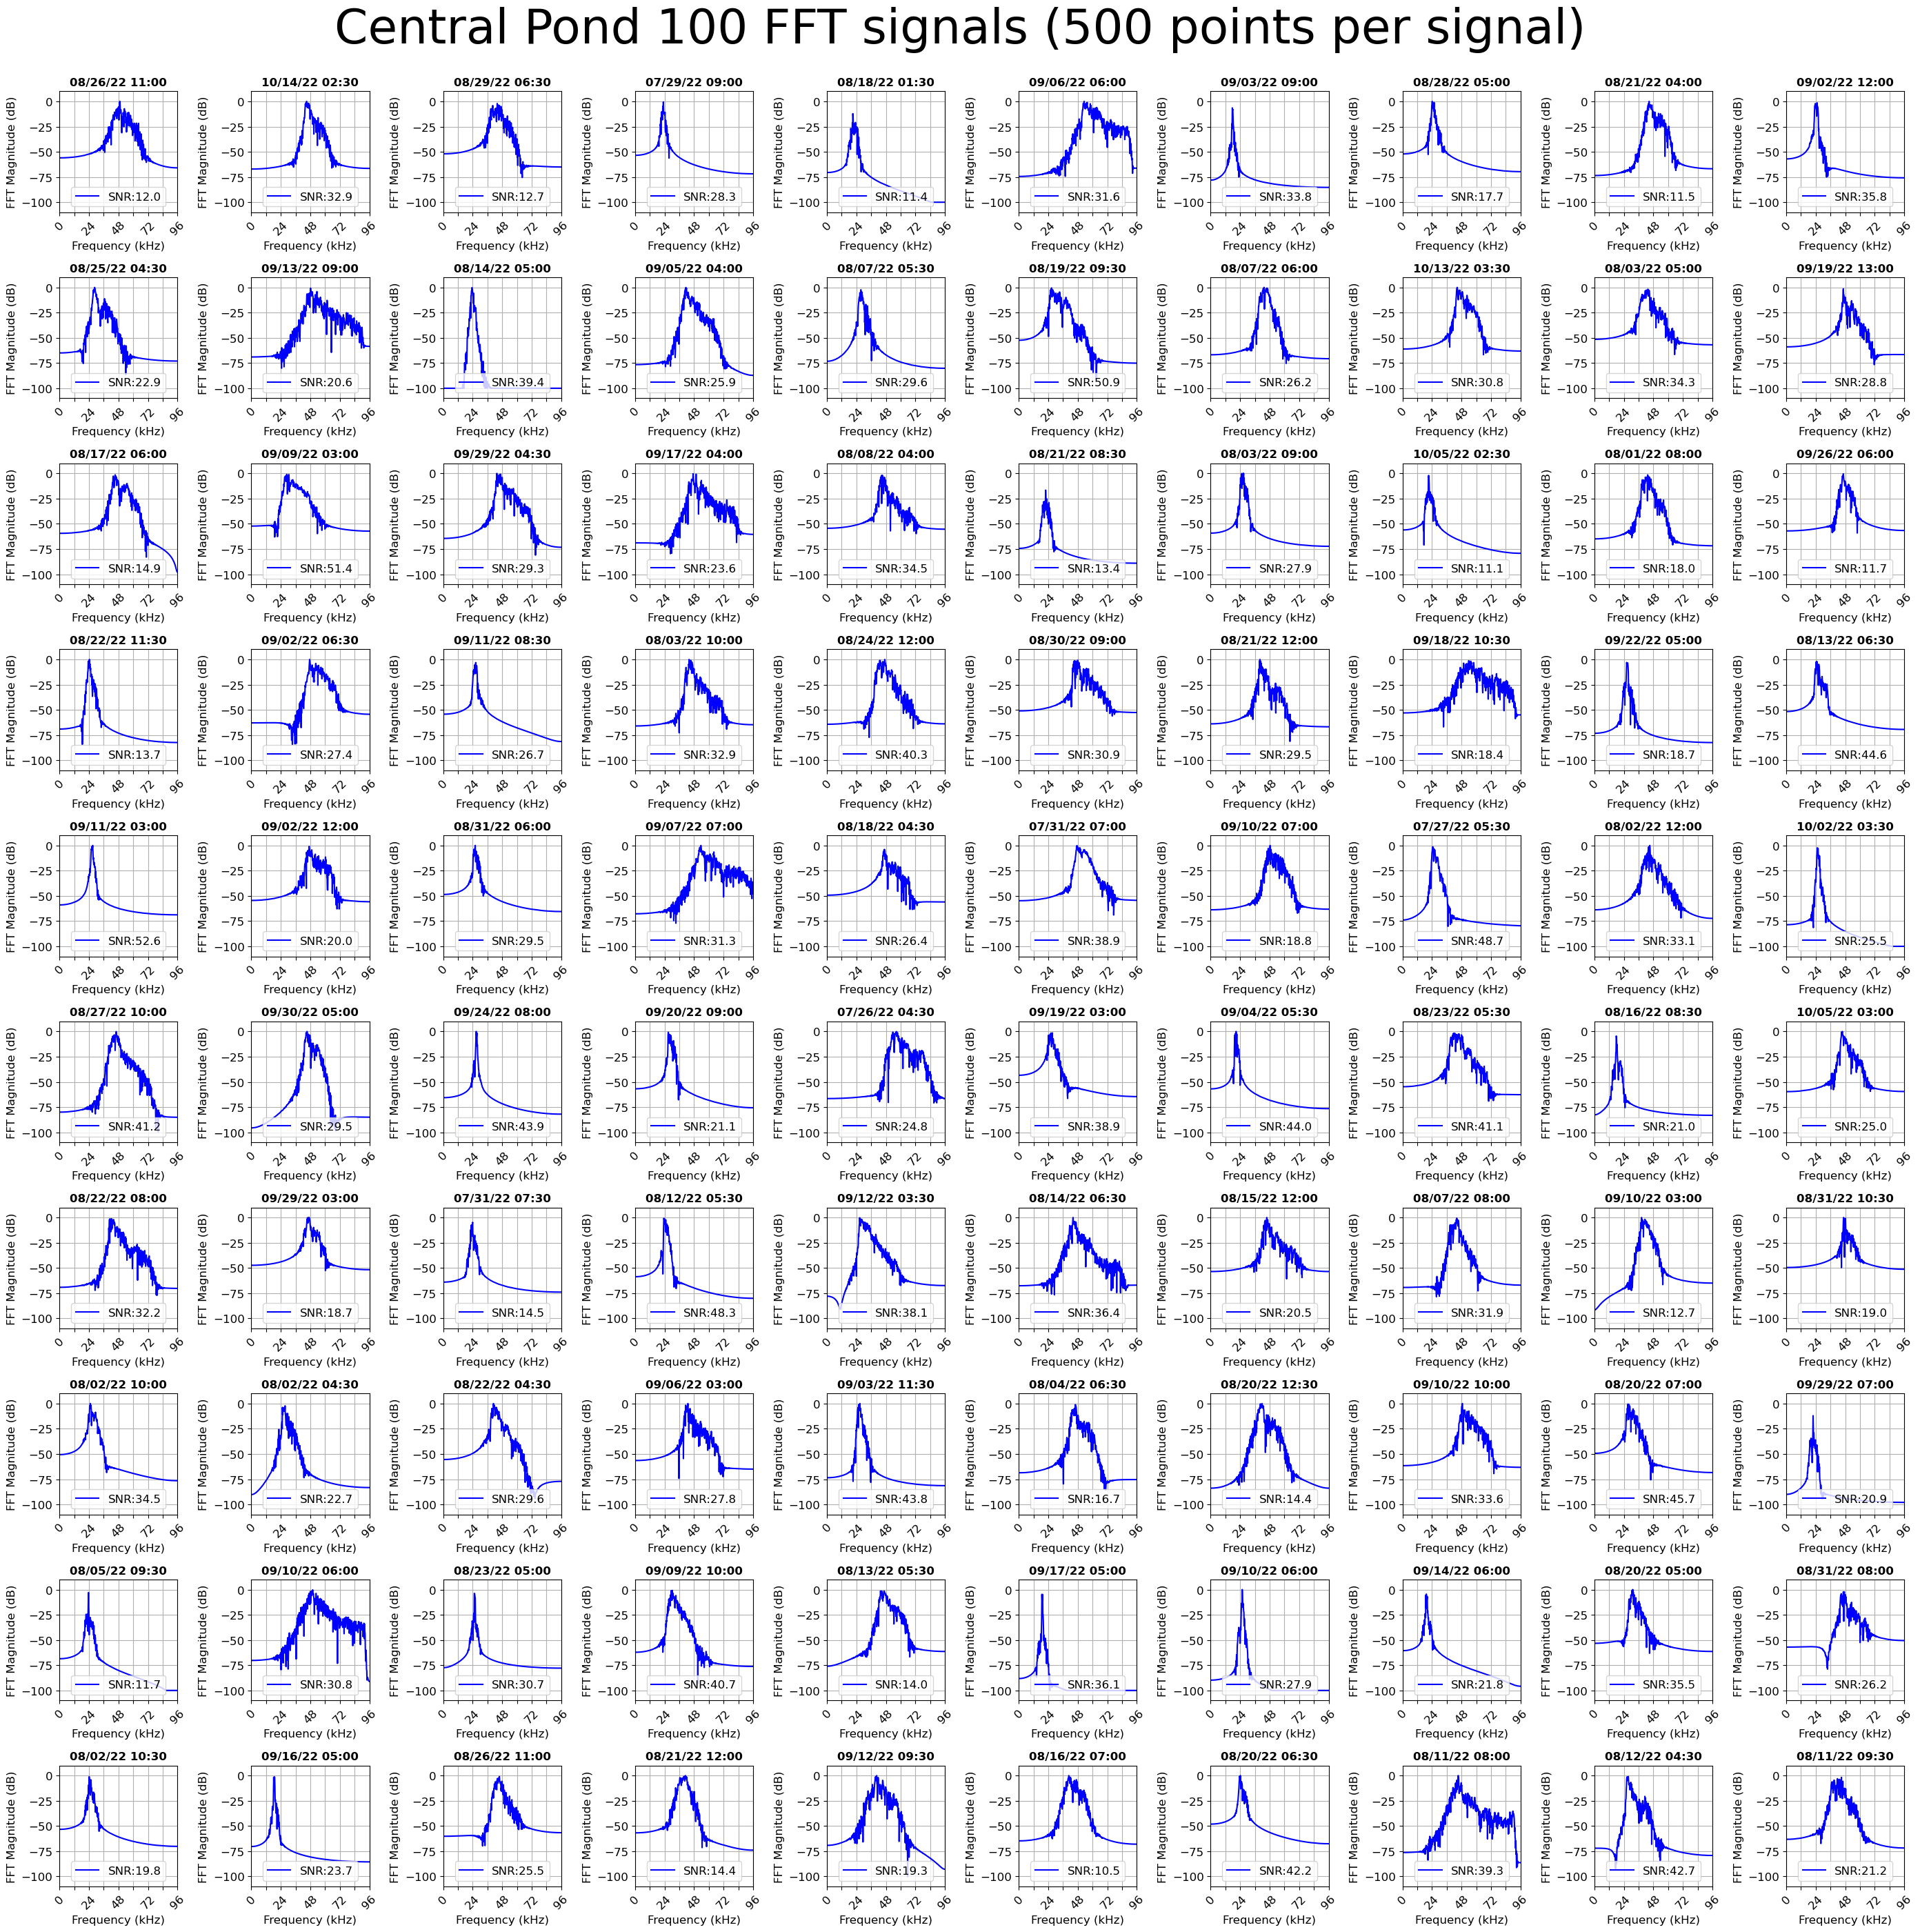

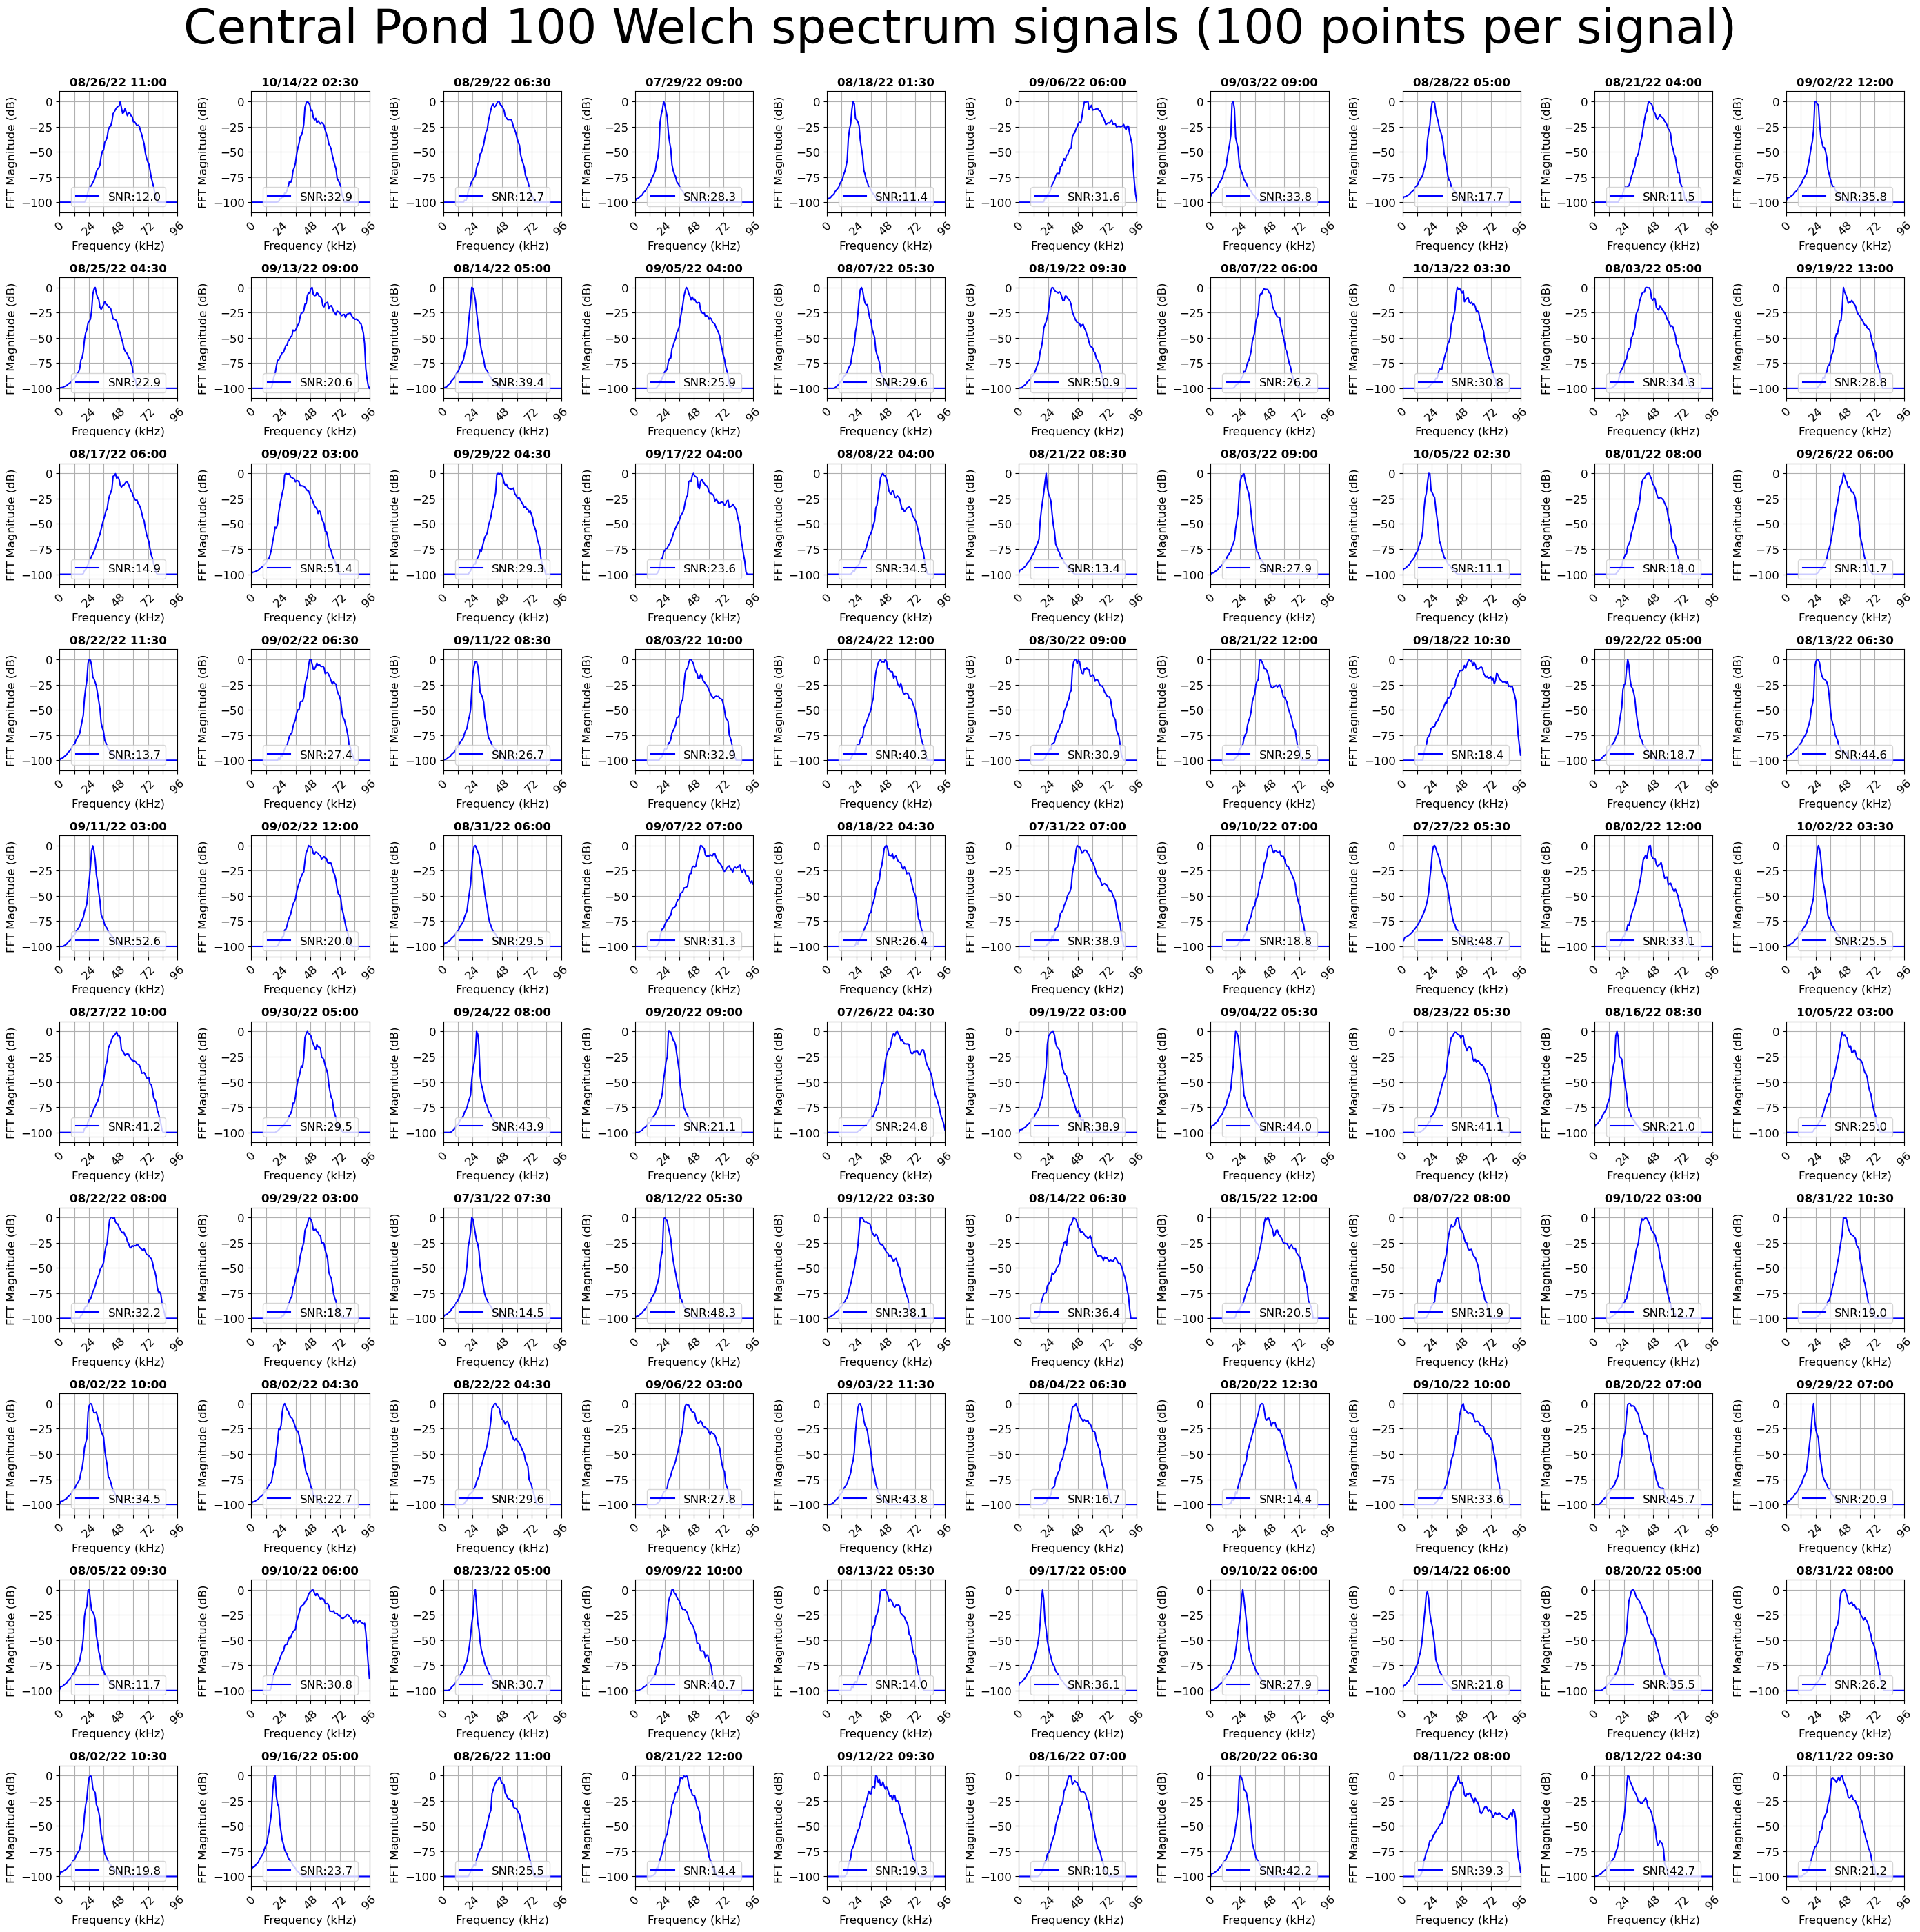

In [7]:
plot_call_features.plot_n_calls(call_indices, good_snr_location_calls_sampled, location_call_signals, site_key)
plot_call_features.plot_n_energies(call_indices, good_snr_location_calls_sampled, location_call_signals, site_key)
plot_call_features.plot_n_cumenergies(call_indices, good_snr_location_calls_sampled, location_call_signals, site_key)
plot_call_features.plot_n_specs(call_indices, good_snr_location_calls_sampled, location_call_signals, site_key)
plot_call_features.plot_n_ffts(call_indices, good_snr_location_calls_sampled, location_call_signals, site_key)
plot_call_features.plot_n_welch(call_indices, good_snr_location_calls_sampled, location_call_signals, site_key)